In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras import optimizers
from keras import losses
from keras import metrics

import numpy as np

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
#train_data[0][:10]

In [3]:
print(type(train_data))

<class 'numpy.ndarray'>


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print(len(train_labels))

60000


In [6]:
print(train_data.shape)

(60000, 28, 28)


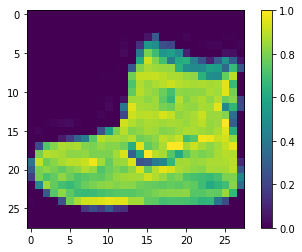

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_labels[0]

9

model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))

model.add(tf.keras.layers.Dense(256, activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(512, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

history = model.fit(
partial_x_train,
partial_y_train,
epochs=10,
batch_size=128,
validation_data=(test_data, test_labels)
)


Epoch 10/10

loss: 0.2608 - accuracy: 0.9012 - val_loss: 0.3223 - val_accuracy: 0.8831

In [22]:
#0.88
"""model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])"""

model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

[30, 64, 0.15, 0.11, 'softplus']
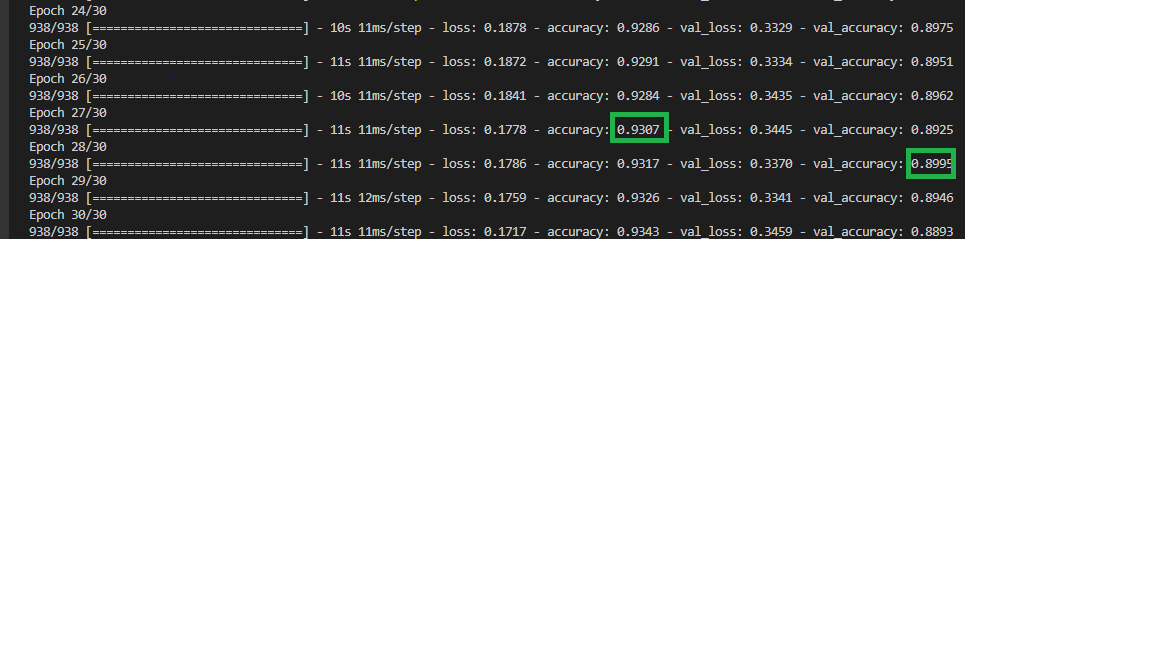


In [10]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val =train_labels[:10000]
partial_y_train = train_labels[10000:]

In [11]:
print(x_val.shape , partial_x_train.shape)

(10000, 28, 28) (50000, 28, 28)


In [12]:
print(y_val.shape ,partial_y_train.shape)

(10000,) (50000,)


In [13]:
partial_y_train[0]

8

In [14]:
print(x_val.shape, y_val.shape)

(10000, 28, 28) (10000,)


In [23]:

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=15,
    batch_size=512,
    validation_data=(test_data, test_labels)
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


98/98 [==============================] - 60s 609ms/step - loss: 0.9174 - accuracy: 0.6610 - val_loss: 0.5161 - val_accuracy: 0.8080
Epoch 2/15
98/98 [==============================] - 62s 633ms/step - loss: 0.5300 - accuracy: 0.8052 - val_loss: 0.4230 - val_accuracy: 0.8501
Epoch 3/15
98/98 [==============================] - 63s 645ms/step - loss: 0.4550 - accuracy: 0.8340 - val_loss: 0.3726 - val_accuracy: 0.8654
Epoch 4/15
98/98 [==============================] - 62s 629ms/step - loss: 0.4165 - accuracy: 0.8499 - val_loss: 0.3536 - val_accuracy: 0.8711
Epoch 5/15
98/98 [==============================] - 60s 611ms/step - loss: 0.3903 - accuracy: 0.8584 - val_loss: 0.3224 - val_accuracy: 0.8869
Epoch 6/15
98/98 [==============================] - 61s 618ms/step - loss: 0.3719 - accuracy: 0.8650 - val_loss: 0.3139 - val_accuracy: 0.8852
Epoch 7/15
98/98 [==============================] - 59s 607ms/step - loss: 0.3605 - accuracy: 0.8693 - val_loss: 0.2985 - val_accuracy: 0.8932
Epoch 8/15

In [24]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 6s - loss: 0.2698 - accuracy: 0.8981 - 6s/epoch - 20ms/step

Test accuracy: 0.8981000185012817


Если 
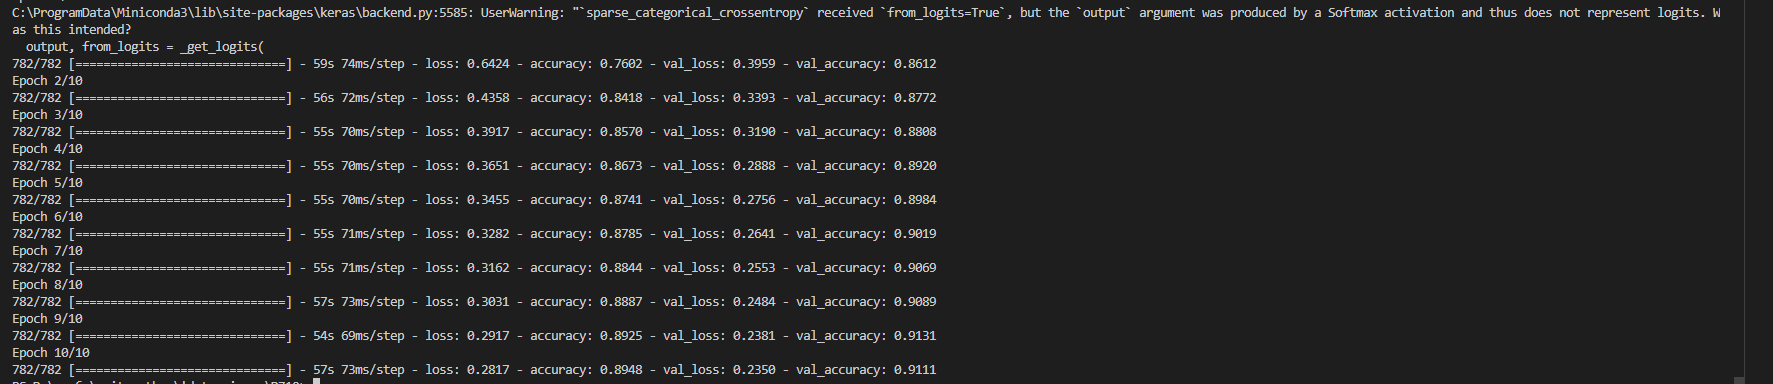epochs=10,
batch_size=64,